In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.dpi'] = 80

In [4]:
for p in sys.path: print(p)

/home/manifold/Documents/python-stuff/optimaltransport/project/numerics
/home/manifold/miniconda3/lib/python37.zip
/home/manifold/miniconda3/lib/python3.7
/home/manifold/miniconda3/lib/python3.7/lib-dynload

/home/manifold/miniconda3/lib/python3.7/site-packages
/home/manifold/Documents/rust-projects/metropolis/pylib
/home/manifold/Documents/rust-projects/point-process-rust/pylib
/home/manifold/miniconda3/lib/python3.7/site-packages/IPython/extensions
/home/manifold/.ipython


# Heat kernel test

The heat kernel in $\mathbb R^d$ is given by
$$
    G_t(z) = \prod_{k=1}^d g_t(z_k)
$$

In [5]:
from heatkernel import HeatKernel

In [65]:
dim = 2  # R^2
xr = np.linspace(-1, 1, 51)
yr = np.linspace(-1, 1, 41)
grid = np.meshgrid(xr, yr)  # base grid
grid_tensor = np.stack(grid, axis=-1)

In [66]:
dt = 0.1

In [67]:
print(grid_tensor.shape)  # shape should be N1 x ... x Nd x d

(41, 51, 2)


In [68]:
htk = HeatKernel(dt, grid_tensor)

Text(0, 0.5, '$y$')

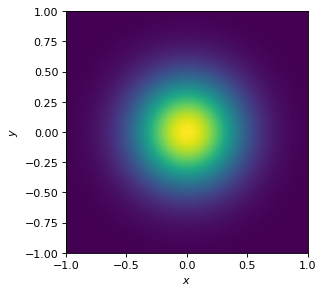

In [69]:
plt.imshow(htk.kernel, extent=[np.min(xr), np.max(xr), np.min(xr), np.max(xr)],
           origin='lower', interpolation='bilinear')
plt.xlabel("$x$")
plt.ylabel("$y$")

## Transition heat kernel

As the paper indicates, the marginal Wiener measure $R^N = R_{t_0,\ldots,t_N}$ (where $t_k = kh = kT/N$), with respect to which we integrate can be broken up into a sequence of heat kernels
$$
    R^N(dx_0,\ldots,dx_N) = \left(\prod_{k=1}^N G_h(x_k-x_{k-1}) \right)
    \,dx_0\,\ldots\,dx_N
$$
Storing the full tensor $R^N$ would be expensive and unnecessary.

We use a class that holds all $d$ transition kernels on the spatial grid. If there are $N_j$ grid points along dimension $j$, then its marginal transition heat kernel is of size $N_j \times N_j$.

In [70]:
from heatkernel import FastHeatKernel

In [77]:
dgrids_ = [g[:, None] - g[None, :] for g in (xr, yr)]  # compute differences

In [78]:
print("Marginal kernel shapes should be:")
for g in dgrids_:
    print(g.shape)

Marginal kernel shapes should be:
(51, 51)
(41, 41)


In [79]:
fast_htk = FastHeatKernel(dt, dgrids_, dim=2)

In [80]:
print("TEST: Marginal kernels in class have shape")
for j, ker in enumerate(fast_htk.kernels):
    print("dim #%d:" % j, ker.shape)

TEST: Marginal kernels in class have shape
dim #0: (51, 51)
dim #1: (41, 41)
